In [11]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Step 1: Load the California Housing Dataset
#import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd

#load the California Housing dataset
california = fetch_california_housing()

#split the data into features (X) and target(y)
X = pd.DataFrame(california.data, columns=california.feature_names) #feature variables
y = pd.Series(california.target) #Target variable(house prices)

#Check the shape of the data
print("Feature data shape:", X.shape)
print("Target data shape:", y.shape)

#Display the first few rows of the dataset
print(X.head())
print(y.head())

Feature data shape: (20640, 8)
Target data shape: (20640,)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


Task 1 - Optimal parameters:
Intercept(theta_0): 0.4508557670326848
Slope(theta_1): 0.41793849201896127
Mean Squared Error(MSE): 0.7011311502929527

Task 2 - Optimal parameters(MLE):
Intercept(theta_0): 0.450856576649535
Slope(theta_1): 0.41793833900487115
Variance(sigma^2): 0.7011311753472153
Mean Squared Error(MSE): 0.7011311502930844

Task 3 - Optimal parameters(Scikit-learn):
Intercept(theta_0): 0.45085576703267694
Slope(theta_1): 0.41793849201896327
Mean Squared Error(MSE): 0.7011311502929527


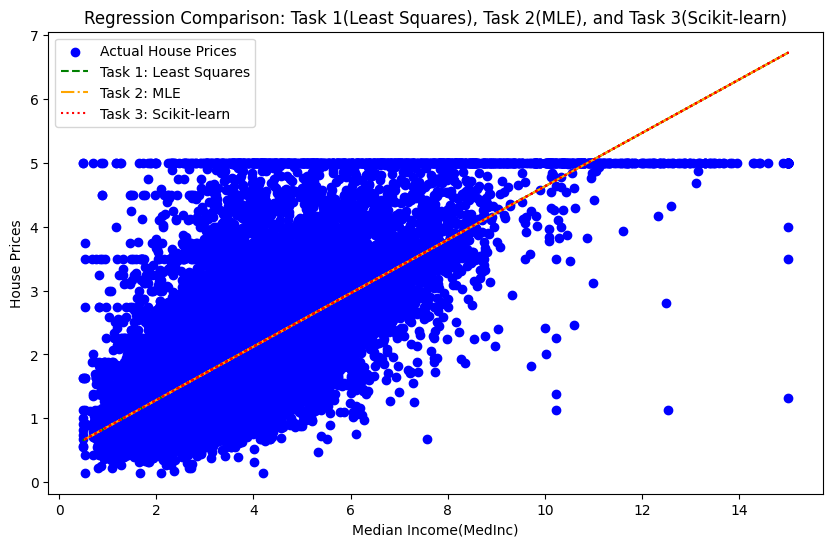

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Load the California Housing Dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Use 'MedInc' (Median Income) as the feature for single-variable regression
X = X[['MedInc']]

# ---------- Task 1: Regression using Least Squares ----------
# Step 2: Add a bias (intercept) term to the features
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Step 3: Calculate theta using the normal equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
intercept_task1, slope_task1 = theta_best
y_pred_task1 = np.dot(X_b, theta_best)
mse_task1 = mean_squared_error(y, y_pred_task1)

print("Task 1 - Optimal parameters:")
print(f"Intercept(theta_0): {intercept_task1}")
print(f"Slope(theta_1): {slope_task1}")
print(f"Mean Squared Error(MSE): {mse_task1}")
print("")


# ---------- Task 2: Regression using Maximum Likelihood Estimation (MLE) ----------
# Define the negative log-likelihood function
def negative_log_likelihood(params, X, y):
    intercept, slope, sigma_sq = params
    n = len(y)
    y_pred = intercept + slope * X[:, 1]
    nll = (n / 2) * np.log(2 * np.pi * sigma_sq) + (1 / (2 * sigma_sq)) * np.sum((y - y_pred) ** 2)
    return nll

# Initial parameters for optimization
initial_params = [0, 0, 1]
result = minimize(negative_log_likelihood, initial_params, args=(X_b, y), method='L-BFGS-B', bounds=[(-10, 10), (-10, 10), (1e-5, None)])
theta_0, theta_1, sigma_sq_mle = result.x
y_pred_task2 = theta_0 + theta_1 * X_b[:, 1]
mse_task2 = mean_squared_error(y, y_pred_task2)

print("Task 2 - Optimal parameters(MLE):")
print(f"Intercept(theta_0): {theta_0}")
print(f"Slope(theta_1): {theta_1}")
print(f"Variance(sigma^2): {sigma_sq_mle}")
print(f"Mean Squared Error(MSE): {mse_task2}")
print("")

# ---------- Task 3: Regression using Scikit-learn ----------
# Initialize and fit the Linear Regression model using Scikit-learn
model = LinearRegression()
model.fit(X, y)
intercept_sklearn = model.intercept_
slope_sklearn = model.coef_[0]
y_pred_task3 = model.predict(X)
mse_task3 = mean_squared_error(y, y_pred_task3)

print("Task 3 - Optimal parameters(Scikit-learn):")
print(f"Intercept(theta_0): {intercept_sklearn}")
print(f"Slope(theta_1): {slope_sklearn}")
print(f"Mean Squared Error(MSE): {mse_task3}")

# ---------- Visualization: Actual vs Predicted values for all tasks ----------
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X, y, color='blue', label='Actual House Prices')

# Plot Task 1 prediction line (Least Squares)
plt.plot(X, y_pred_task1, color='green', linestyle='--', label='Task 1: Least Squares')

# Plot Task 2 prediction line (MLE)
plt.plot(X, y_pred_task2, color='orange', linestyle='-.', label='Task 2: MLE')

# Plot Task 3 prediction line (Scikit-learn)
plt.plot(X, y_pred_task3, color='red', linestyle='dotted', label='Task 3: Scikit-learn')

# Add labels, title, and legend
plt.xlabel('Median Income(MedInc)')
plt.ylabel('House Prices')
plt.title('Regression Comparison: Task 1(Least Squares), Task 2(MLE), and Task 3(Scikit-learn)')
plt.legend()

# Show the plot
plt.show()
